<a href="https://colab.research.google.com/github/bjoyita/Regression_ML/blob/main/RegTut_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# for loss functions and R square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from  sklearn.metrics import r2_score

**Loading dataset with kappa as X (4th column of the original data) and ZT as y**

In [2]:
dataset = pd.read_csv('RT_TEprop.csv')
X = dataset.iloc[:, 4].values
y = dataset.iloc[:, -1].values

**Splitting data into Training and Test sets**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [4]:
# Reshaping required as fit() method of the LinearRegression class expects a 2D array as input.
X_train=X_train.reshape(183,1)
y_train=y_train.reshape(183,1)

**Fitting with linear regression model**

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Prediction**

In [6]:
X_test=X_test.reshape(21,1)
y_test=y_test.reshape(21,1)

In [7]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8.21e-02  2.00e-02]
 [ 8.86e-02  3.00e-02]
 [-6.64e-02  2.84e-03]
 [ 7.38e-02  1.59e-06]
 [ 7.33e-02  5.13e-03]
 [ 9.07e-02  2.20e-01]
 [ 8.97e-02  2.00e-02]
 [ 8.13e-02  3.00e-02]
 [ 8.97e-02  3.00e-02]
 [ 9.05e-02  3.00e-02]
 [ 7.12e-02  3.79e-04]
 [ 8.62e-02  1.50e-01]
 [ 8.55e-02  1.00e-01]
 [ 8.97e-02  2.00e-02]
 [ 8.13e-02  1.85e-04]
 [ 8.92e-02  1.00e-02]
 [ 8.46e-02  2.70e-01]
 [ 9.21e-02  6.00e-02]
 [ 5.95e-02  3.20e-03]
 [ 6.06e-02  1.81e-03]
 [ 8.86e-02  2.00e-02]]


**Plotting**

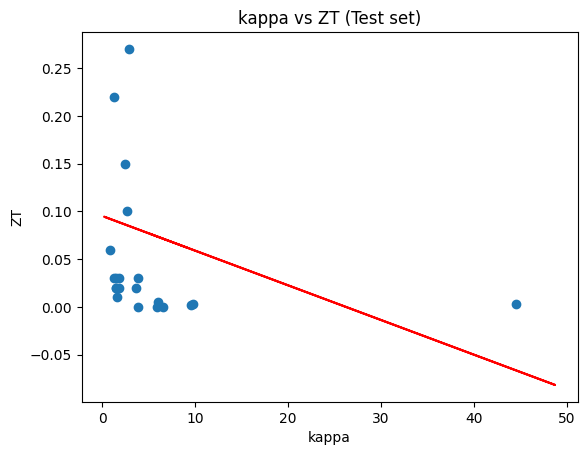

In [8]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), "r")
plt.title("kappa vs ZT (Test set)")
plt.xlabel("kappa")
plt.ylabel("ZT")
plt.show()

**Computing Loss functions**

In [9]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.07059993216927259


In [10]:
print("Mean square error is ",mean_squared_error(y_test,y_pred))

Mean square error is  0.00606286753428833


In [11]:
# root mean square error, rmse
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_lr

0.07786441763917798

**R-squared**

In [12]:
r2_score_lr= r2_score(y_test, y_pred)
r2_score_lr

-0.1281233534684132

**POLYNOMIAL REGRESSION WITH ONE FEATURE (kappa)**

In [13]:
poly = PolynomialFeatures(degree=2)
poly_features_1 = poly.fit_transform(X.reshape(-1,1))


In [14]:
poly_features_1.shape

(204, 3)

In [15]:
poly_features_1

array([[1.00e+00, 2.51e+00, 6.32e+00],
       [1.00e+00, 2.27e+00, 5.14e+00],
       [1.00e+00, 2.50e+00, 6.25e+00],
       [1.00e+00, 1.79e+00, 3.19e+00],
       [1.00e+00, 2.85e+00, 8.12e+00],
       [1.00e+00, 1.48e+00, 2.20e+00],
       [1.00e+00, 2.17e+00, 4.71e+00],
       [1.00e+00, 1.64e+00, 2.68e+00],
       [1.00e+00, 2.14e+00, 4.60e+00],
       [1.00e+00, 1.49e+00, 2.22e+00],
       [1.00e+00, 1.79e+00, 3.21e+00],
       [1.00e+00, 3.56e+00, 1.27e+01],
       [1.00e+00, 1.49e+00, 2.22e+00],
       [1.00e+00, 1.73e+00, 2.98e+00],
       [1.00e+00, 1.65e+00, 2.71e+00],
       [1.00e+00, 1.10e+00, 1.21e+00],
       [1.00e+00, 1.90e+00, 3.61e+00],
       [1.00e+00, 1.62e+01, 2.63e+02],
       [1.00e+00, 3.59e+00, 1.29e+01],
       [1.00e+00, 2.99e+00, 8.94e+00],
       [1.00e+00, 9.67e+00, 9.35e+01],
       [1.00e+00, 9.16e+00, 8.38e+01],
       [1.00e+00, 9.71e+00, 9.44e+01],
       [1.00e+00, 9.42e+00, 8.87e+01],
       [1.00e+00, 8.87e+00, 7.86e+01],
       [1.00e+00, 6.85e+0

In [16]:
X1_train, X1_test, y1_train, y1test = train_test_split(poly_features_1, y, test_size=0.1, random_state=42)

In [17]:
X1_train.shape

(183, 3)

In [18]:
y1_train.shape

(183,)

In [19]:
lr.fit(X1_train, y1_train)

LinearRegression()

In [20]:
y1_pred = lr.predict(X1_test)

In [21]:
print("MAE",mean_absolute_error(y1test,y1_pred))

MAE 0.08870040597940537


In [22]:
print("MSE",mean_squared_error(y1test, y1_pred))

MSE 0.015505510025975732


In [23]:
rmse_poly1 = np.sqrt(mean_squared_error(y1test, y1_pred))
rmse_poly1

0.12452112281045224

In [24]:
R_square_p1 = r2_score(y1test, y1_pred)
R_square_p1

-0.015278431801236891

In [26]:
from tabulate import tabulate

Eval_table = [["MAE", 0.089], ["MSE",0.016], ['RMSE', 0.125], ['R-squared', -0.015]]
print(tabulate(Eval_table))

---------  ------
MAE         0.089
MSE         0.016
RMSE        0.125
R-squared  -0.015
---------  ------
